### Nathan Hamilton<br>CSCD 496<br>Assignment 1

Write a program to flip 1000 fair coins. Flip each coin 10 times, then select three coins as follows:<br>
 - select the first coin flipped ($c_1$)
 - select the first coin with the minimum number of heads ($c_{min}$)
 - select a coin at random ($c_{rand}$)

Let $\nu_1$, $\nu_{min}$, and $\nu_{rand}$ be the fraction of heads for the three selected coins. Let $\mu$ be the actual probability of heads.

What is $\mu$ for the coins?

0.5

Repeat the experiment a great number of times (e.g. 100,000). Collect $\nu_1$, $\nu_{min}$, and $\nu_{rand}$ for each experiment. Plot histograms for $\nu_1$, $\nu_{min}$, and $\nu_{rand}$ to see what the distribution looks like. Note that the coin for $c_{min}$ and $c_{rand}$ will probably be different for each run.

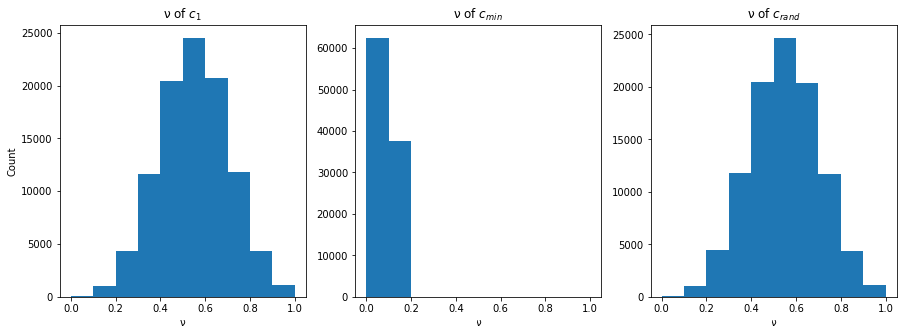

In [9]:
import numpy as np
import matplotlib.pyplot as plt

X = 1000   # Number of Coins
Y = 10     # Number of Flips per Coin
Z = 100000 # Number of Data Samples

nu_1_list = []
nu_min_list = []
nu_rand_list = []

for x in range(Z):
    data = np.random.binomial(size = X * Y, n = 1, p = 0.5)
    data = data.reshape(1000,10)
    
    # Index of the first coin flipped - c_1
    first_idx = 0;

    # Index of the first coin with minimum heads flipped - c_min
    sumArray = np.sum(data, axis = 1)[:X]
    minArray = np.where(sumArray == min(sumArray))
    min_idx = minArray[0][0]

    # Index of a random coin - c_rand
    rand_idx = np.random.choice(X)
    
    # Calculate nu for each selected coin and add to corresponding list
    nu_1_list.append(sumArray[first_idx] / Y)
    nu_min_list.append(sumArray[min_idx] / Y)
    nu_rand_list.append(sumArray[rand_idx] / Y)
# End for

# Plot Nu Histograms
x_axis = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
Fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].hist(nu_1_list, bins=x_axis)
axs[0].set_title("\u03BD of $c_1$")
axs[1].hist(nu_min_list, bins=x_axis)
axs[1].set_title("\u03BD of $c_{min}$")
axs[2].hist(nu_rand_list, bins=x_axis)
axs[2].set_title("\u03BD of $c_{rand}$")
for ax in axs.flat:
    ax.set(xlabel = "\u03BD")
axs[0].set_ylabel("Count")
plt.show()

Plot the Hoeffding bound $2 * e^{-2\epsilon^2N}$ along with the $P(|\nu - \mu|) > \epsilon$ for different values of $\epsilon$. $N$ is the number of training examples (10 in this case), and the number of hypothesis is $X$ = 1000.

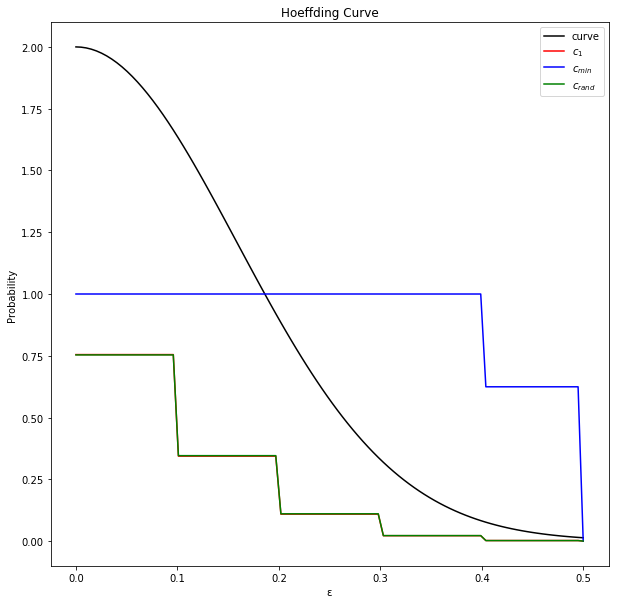

In [12]:
# Probability Helper Methods
y = lambda epsilon: 2.0 * np.exp(-2 * Y * epsilon ** 2)
def prob(nu, epsilon, samples):
    abs_list = np.abs(np.asarray(nu) - 0.5)
    return np.sum(np.greater(abs_list, epsilon)) / float(samples)

# Hoeffding Plot Definitions
Fig, axs = plt.subplots(1, 1, figsize=(10, 10), sharey=True)
x_list = np.linspace(0.0, 0.5, 100)
axs.set_title("Hoeffding Curve")
axs.set(xlabel = "\u03B5", ylabel = "Probability")

# Hoeffding Curve
y_list = np.array([y for y in y(x_list)])
hoeff = axs.plot(x_list, y_list, c = "black", label = "curve")

# C_1 Plot
prob_1_list = np.array([prob(nu_1_list, x, Z) for x in x_list])
axs.plot(x_list, prob_1_list, c = "red", label = "$c_1$")

# C_Min Plot
prob_min_list = np.array([prob(nu_min_list, x, Z) for x in x_list])
axs.plot(x_list, prob_min_list, c = "blue", label = "$c_{min}$")

# C_Rand Plot
prob_rand_list = np.array([prob(nu_rand_list, x, Z) for x in x_list])
axs.plot(x_list, prob_rand_list, c = "green", label = "$c_{rand}$")

axs.legend()
plt.show()

Which of the selected coins obey the Hoeffding bound? Which do not? Why?

$c_1$ and $c_{rand}$ always follow the Hoeffding bound, but $c_{min}$ does not. This is due to the fact that $c_{min}$ is specifically selected by searching through the data, which violates the Hoeffding Inequality's assumption that the data is not searched. The other two coins are selected without searching.

Explain how this model compares to the bin model described in the book and lecture.

The bin model highlights how sampling one set of data *may* or *may not* produce results that are consistent with our hypotheses. To fix this, you must sample the data a great number of times, as well as increase the size of the bins. Both of those methods are implemented in this coin flipping model as well. By increasing the number of times we flip each coin to 10, and increasing the number of samples to 100,000, the model effectively produces a *near perfect* normal distribution.